In [1]:
import socket
myHostName = socket.gethostname()

print("Name of the localhost is {}".format(myHostName))
myIP = socket.gethostbyname(myHostName)

print("IP address of the localhost is {}".format(myIP))

Name of the localhost is DESKTOP-BGUQE12
IP address of the localhost is 10.44.107.11


In [2]:
import findspark
findspark.init('C:\Spark')

In [3]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
import os
import sys
import re
import random
import findspark
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from time import time
from pyspark import SparkContext
from pyspark import SparkConf
conf = SparkConf().setAppName("151805046_ElifMuslu")
sc = SparkContext.getOrCreate(conf=conf)
sqlContext = SQLContext(sc)
from numpy import array
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

from pyspark import SparkContext
from pyspark.mllib.clustering import KMeans, KMeansModel

In [4]:
sqlContext = SQLContext(sc)
base = "C:\\Users\\ITU\Desktop\\151805046_ElifMuslu_Assignment3\\lastfm-dataset-360k-small\\"

In [5]:
userArtistDataSchema = StructType([ \
    StructField("userID", LongType(), True), \
    StructField("artistID", LongType(), True), \
    StructField("playCount", IntegerType(), True)])

userArtistDF = sqlContext.read \
    .format('com.databricks.spark.csv') \
    .options(header='false', delimiter=' ') \
    .load(base + "user_artist_data.txt", schema = userArtistDataSchema) \
    .cache()

# we can cache an Dataframe to avoid computing it from the beginning everytime it is accessed.
userArtistDF.cache()

userArtistDF.show()

+-------+--------+---------+
| userID|artistID|playCount|
+-------+--------+---------+
|1059637| 1000010|      238|
|1059637| 1000049|        1|
|1059637| 1000056|        1|
|1059637| 1000062|       11|
|1059637| 1000094|        1|
|1059637| 1000112|      423|
|1059637| 1000113|        5|
|1059637| 1000114|        2|
|1059637| 1000123|        2|
|1059637| 1000130|    19129|
|1059637| 1000139|        4|
|1059637| 1000241|      188|
|1059637| 1000263|      180|
|1059637| 1000289|        2|
|1059637| 1000305|        1|
|1059637| 1000320|       21|
|1059637| 1000340|        1|
|1059637| 1000427|       20|
|1059637| 1000428|       12|
|1059637| 1000433|       10|
+-------+--------+---------+
only showing top 20 rows



In [6]:
uniqueUsers = userArtistDF.select("userID").distinct().count()
print("Total n. of users: ", uniqueUsers)

Total n. of users:  50


In [7]:
uniqueArtists = userArtistDF.select("artistID").distinct().count()
print("Total n. of artists: ", uniqueArtists)

Total n. of artists:  30677


In [8]:
userArtistDF.describe().show()

+-------+------------------+------------------+------------------+
|summary|            userID|          artistID|         playCount|
+-------+------------------+------------------+------------------+
|  count|             49481|             49481|             49481|
|   mean|1328420.1949435137|2003155.0297285826|130.57579677047755|
| stddev| 452991.3131262286|2489609.3644763026|3034.3847545693047|
|    min|           1000647|                 1|                 1|
|    max|           2288164|          10788218|            439771|
+-------+------------------+------------------+------------------+



In [10]:
userArtistDF.describe().show()

+-------+------------------+------------------+------------------+
|summary|            userID|          artistID|         playCount|
+-------+------------------+------------------+------------------+
|  count|             49481|             49481|             49481|
|   mean|1328420.1949435137|2003155.0297285826|130.57579677047755|
| stddev| 452991.3131262286|2489609.3644763026|3034.3847545693047|
|    min|           1000647|                 1|                 1|
|    max|           2288164|          10788218|            439771|
+-------+------------------+------------------+------------------+



In [12]:
# Compute user activity
# We are interested in how many playcounts each user has scored.
userActivity = userArtistDF.groupBy("userID").sum("playCount").collect()
userActivity[0:5]

[Row(userID=2010008, sum(playCount)=77724),
 Row(userID=2020513, sum(playCount)=165642),
 Row(userID=1055449, sum(playCount)=73484),
 Row(userID=1058890, sum(playCount)=98477),
 Row(userID=1041919, sum(playCount)=73029)]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


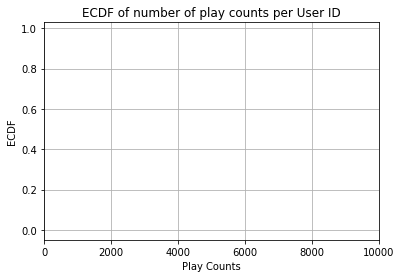

In [13]:
pdf = pd.DataFrame(data=userActivity)
Y=np.sort( pdf[1] )
yvals=np.arange(len(Y))/float(len(Y))

print(np.arange(len(Y)))

plt.plot( Y, yvals )
plt.xlabel('Play Counts')
plt.xlim(0,10000)   # We shrink the window 
plt.ylabel('ECDF')
plt.grid(True,which="both",ls="-")
plt.title('ECDF of number of play counts per User ID')
plt.show()

In [14]:
pdf = pd.DataFrame(data=userActivity)
Y=np.sort( pdf[1] )
yvals=np.arange(len(Y))/float(len(Y))
# Additional relevant code
percentiles = [0.03, 0.10, 0.25, 0.50, 0.75, 0.90]
for p in percentiles:
    i = np.where(yvals<=p)[0][-1]    
    print(str(p*100),"percent of the users has less than: ",Y[i]," play counts")

3.0 percent of the users has less than:  73029  play counts
10.0 percent of the users has less than:  74032  play counts
25.0 percent of the users has less than:  76063  play counts
50.0 percent of the users has less than:  83402  play counts
75.0 percent of the users has less than:  135266  play counts
90.0 percent of the users has less than:  183972  play counts


In [15]:
# Compute artist popularity
# We are interested in how many playcounts per artist
# ATTENTION! Grouping by artistID may be problematic, as stated above.

artistPopularity = userArtistDF.groupby("artistID").sum("playCount").collect()

[    0     1     2 ... 30674 30675 30676]


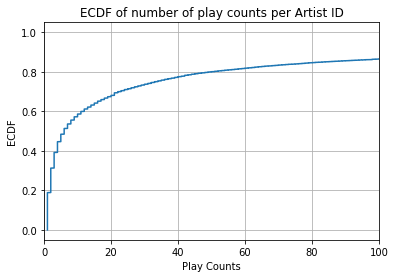

In [14]:
pdf = pd.DataFrame(data=artistPopularity)
Y=np.sort( pdf[1] )
yvals=np.arange(len(Y))/float(len(Y))

print(np.arange(len(Y)))

plt.plot( Y, yvals )
plt.xlabel('Play Counts')
plt.xlim(0,100)
plt.ylabel('ECDF')
plt.grid(True,which="both",ls="-")
plt.title('ECDF of number of play counts per Artist ID')
plt.show()

In [15]:
# Additional relevant code
percentiles = [0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
for p in percentiles:
    i = np.where(yvals<=p)[0][-1]    
    print(str(p*100),"percent of the artists has less than: ",Y[i]," play counts")

25.0 percent of the artists has less than:  2  play counts
50.0 percent of the artists has less than:  6  play counts
75.0 percent of the artists has less than:  34  play counts
90.0 percent of the artists has less than:  170  play counts
95.0 percent of the artists has less than:  515  play counts
99.0 percent of the artists has less than:  3260  play counts


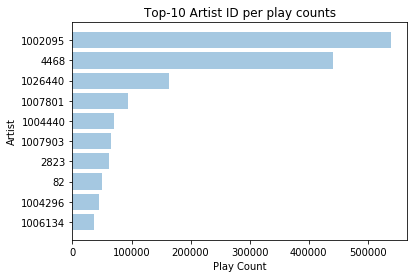

In [16]:
sortedArtist = sorted(artistPopularity, key = lambda x: -x[1])[: 10]

artistID = [w[0] for w in sortedArtist]

y_pos = range(len(sortedArtist))
frequency = [w[1] for w in sortedArtist]

plt.barh(y_pos, frequency[::-1], align='center', alpha=0.4)
plt.yticks(y_pos, artistID[::-1])
plt.xlabel('Play Count')
plt.ylabel('Artist')
plt.title('Top-10 Artist ID per play counts')
plt.show()

In [17]:
# Additional relevant code
print("Total n. of users: ", uniqueUsers)
print("Total n. of artists: ", uniqueArtists)



Total n. of users:  50
Total n. of artists:  30677


In [18]:
customSchemaArtist = StructType([ \
    StructField("artistID", LongType(), True), \
    StructField("name", StringType(), True)])

artistDF = sqlContext.read \
    .format('com.databricks.spark.csv') \
    .options(header='false', delimiter='\t', mode='DROPMALFORMED') \
    .load(base + "artist_data.txt", schema = customSchemaArtist) \
    .cache()
    
artistDF.show(5)

+--------+--------------------+
|artistID|                name|
+--------+--------------------+
| 1240105|        André Visior|
| 1240113|           riow arai|
| 1240132|Outkast & Rage Ag...|
| 6776115|            小松正夫|
| 1030848|      Raver's Nature|
+--------+--------------------+
only showing top 5 rows



In [19]:
# get artists whose name contains "Aerosmith"
artistDF[locate("Aerosmith", artistDF.name) > 0].show(20,False)

# show two examples
artistDF[artistDF.artistID==1000010].show()
artistDF[artistDF.artistID==2082323].show()

+--------+---------+
|artistID|name     |
+--------+---------+
|1000010 |Aerosmith|
+--------+---------+

+--------+---------+
|artistID|     name|
+--------+---------+
| 1000010|Aerosmith|
+--------+---------+

+--------+----+
|artistID|name|
+--------+----+
+--------+----+



Artist rank  1  : Something Corporate
Artist rank  2  : System of a Down
Artist rank  3  : My Chemical Romance
Artist rank  4  : Mates of State
Artist rank  5  : Guided by Voices
Artist rank  6  : Maroon 5
Artist rank  7  : Alanis Morissette
Artist rank  8  : Pink Floyd
Artist rank  9  : Thrice
Artist rank  10  : Sage Francis


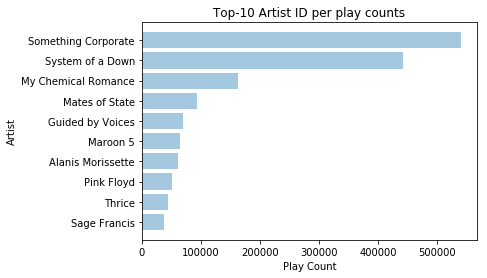

In [20]:
# Additional infos, see who are the top-10 artist names
artistNames = []
for (i,artistID) in enumerate([s[0] for s in sortedArtist[0:10]]):
    artistNames.append(artistDF[artistDF.artistID==artistID].collect()[0][1])
    print("Artist rank ", i+1, " :", artistNames[i])
sortedArtist = sorted(artistPopularity, key = lambda x: -x[1])[: 10]

artistID = [w[0] for w in sortedArtist]

y_pos = range(len(sortedArtist))
frequency = [w[1] for w in sortedArtist]

plt.barh(y_pos, frequency[::-1], align='center', alpha=0.4)
plt.yticks(y_pos, artistNames[::-1])
plt.xlabel('Play Count')
plt.ylabel('Artist')
plt.title('Top-10 Artist ID per play counts')
plt.show()

In [21]:
customSchemaArtistAlias = StructType([ \
    StructField("mispelledID", LongType(), True), \
    StructField("standardID",LongType(), True)])

artistAliasDF = sqlContext.read \
    .format('com.databricks.spark.csv') \
    .options(header='false', delimiter='\t', mode='DROPMALFORMED') \
    .load(base + "artist_alias.txt", schema = customSchemaArtistAlias) \
    .cache()

artistAliasDF.show(5)

+-----------+----------+
|mispelledID|standardID|
+-----------+----------+
|    1027859|   1252408|
|    1017615|       668|
|    6745885|   1268522|
|    1018110|   1018110|
|    1014609|   1014609|
+-----------+----------+
only showing top 5 rows



In [22]:
artistAliasDF[artistAliasDF.mispelledID==1000010].show()
artistAliasDF[artistAliasDF.mispelledID==2082323].show()

# 1000010 is a standard id, so it haven't been considered as mispelled id in the dataset

+-----------+----------+
|mispelledID|standardID|
+-----------+----------+
+-----------+----------+

+-----------+----------+
|mispelledID|standardID|
+-----------+----------+
+-----------+----------+



In [23]:
def is_standard(id1):
    """Return True is the ID is not in the mispelledID column of artistAliasDF"""
    if artistAliasDF[artistAliasDF.mispelledID==id1].collect()==[]:
        return True
    else:
        return False

In [24]:
# Additional code
def scan_artist(artistID):
    """Print some information about the artist given 
    It shows that several entries (user,artist,) exist in newUserArtistDF
    Example: scan_artist(1000010)"""
    artistNameDF = newUserArtistDF.where(newUserArtistDF.artistID==artistID).cache()
    artist = artistDF[artistDF.artistID==artistID].first()
    mispelled = artistAliasDF[artistAliasDF.standardID==artistID].count()
    artistDF[locate(artist.name, artistDF.name) >0].count()
    if artistNameDF is None or artist is None:
        print("The ID provided is not valid, please provide a valid ID")
        return
    print("Id : ", artist.artistID, "Artist name : ", artist.name)
    print(mispelled, " mispelledIDs are associated to artist ", artist.name)
    print()
    print(artist.name, " appears ", artistNameDF.count(), " times in newUserArtistDF")
    print(artistNameDF.select("userID").distinct().count(), " distinct users listen to ", artist.name)
    print(artistNameDF.groupBy('userID').count().where(col("count")>1).count(), "users listen to ", \
          artist.name, " through a mispelledID")
    scan_artist(1000010)

In [25]:
print(artistDF[locate("Aerosmith", artistDF.name) >0].count(), "artist names contain Aerosmith")
print(artistAliasDF[artistAliasDF.standardID==1000010].count(), "mispelledIDs point to Aerosmith")

1 artist names contain Aerosmith
0 mispelledIDs point to Aerosmith


In [26]:
pdf # sortedArtist after fixing the mispelledIDs

,0,1
0,2010008,77724
1,2020513,165642
2,1055449,73484
3,1058890,98477
4,1041919,73029
5,2102019,72855
6,1059765,76063
7,1024631,122316
8,1042223,74060
9,1052461,175822


In [28]:
sortedArtist # sortedArtist before fixing the mispelledIDs

[Row(artistID=1002095, sum(playCount)=539931),
 Row(artistID=4468, sum(playCount)=441642),
 Row(artistID=1026440, sum(playCount)=163428),
 Row(artistID=1007801, sum(playCount)=94062),
 Row(artistID=1004440, sum(playCount)=70218),
 Row(artistID=1007903, sum(playCount)=65142),
 Row(artistID=2823, sum(playCount)=61098),
 Row(artistID=82, sum(playCount)=50245),
 Row(artistID=1004296, sum(playCount)=44550),
 Row(artistID=1006134, sum(playCount)=37194)]

In [29]:
rawArtistAlias = sc.textFile(base + "artist_alias.txt")

def xtractFields(s):
    # Using white space or tab character as separetors,
    # split a line into list of strings 
    line = re.split("\s|\t",s,1)
    # if this line has at least 2 characters
    if (len(line) > 1):
        try:
            # try to parse the first and the second components to integer type
            return (int(line[0]), int(line[1]))
        except ValueError:
            # if parsing has any error, return a special tuple
            return (-1,-1)
    else:
        # if this line has less than 2 characters, return a special tuple
        return (-1,-1)

artistAlias = (
                rawArtistAlias
                    # extract fields using function xtractFields
                    .map(xtractFields)
    
                    # fileter out the special tuples
                    .filter(lambda row: row!=(-1,-1))
    
                    # collect result to the driver as a "dictionary"
                    .collectAsMap()
                )

In [30]:
bArtistAlias = sc.broadcast(artistAlias)
rawUserArtistData = sc.textFile(base + "user_artist_data.txt")

def disambiguate(line):
    [userID, artistID, count] = line.split(' ')
    finalArtistID = bArtistAlias.value.get(artistID, artistID)
    return (userID, finalArtistID, count)

userArtistDataRDD = rawUserArtistData.map(disambiguate)
userArtistDataRDD.take(5)

[('1059637', '1000010', '238'),
 ('1059637', '1000049', '1'),
 ('1059637', '1000056', '1'),
 ('1059637', '1000062', '11'),
 ('1059637', '1000094', '1')]

In [31]:
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

In [32]:
allData = userArtistDataRDD.map(lambda r: Rating(r[0], r[1],r[2])).repartition(10).cache()

In [33]:
t0 = time()
model = ALS.trainImplicit(allData, 10, 5, 0.01, alpha=1.0)
t1 = time()
print("finish training model in %f secs" % (t1 - t0))

finish training model in 16.437394 secs


In [34]:
first_row = model.userFeatures().first()
first_row

(1001440,
 array('d', [-0.027893098071217537, -0.13654479384422302, 0.24486614763736725, -0.11970755457878113, 0.5477043986320496, -0.13958902657032013, -0.44391554594039917, -0.24984370172023773, 0.49468573927879333, -0.3293299973011017]))

In [35]:
len(first_row[1])

10

In [36]:
rawArtistAlias = sc.textFile(base + "artist_alias.txt")

rawArtistAlias.take(5)

['1027859\t1252408',
 '1017615\t668',
 '6745885\t1268522',
 '1018110\t1018110',
 '1014609\t1014609']

In [37]:
def isInt(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

In [38]:
artistAlias = rawArtistAlias \
    .map(lambda line: line.split("\t")) \
    .filter(lambda line: line[0] and isInt(line[0])) \
    .map(lambda p: (int(p[0]), int(p[1]))) \
    .collectAsMap()

In [39]:
rawUserArtistData = sc.textFile(base + "user_artist_data.txt")

rawUserArtistData.take(5)

['1059637 1000010 238',
 '1059637 1000049 1',
 '1059637 1000056 1',
 '1059637 1000062 11',
 '1059637 1000094 1']

In [40]:
bArtistAlias = sc.broadcast(artistAlias)


def replaceMisspelledIDs(line):
    [userID, artistID, playCount] = map(lambda p: int(p), line.split(" "))
    finalArtistID = bArtistAlias.value.get(artistID, artistID)
    return (userID, finalArtistID, playCount)

userArtistDataRDD = rawUserArtistData.map(replaceMisspelledIDs)

userArtistDataRDD.take(5)

[(1059637, 1000010, 238),
 (1059637, 1000049, 1),
 (1059637, 1000056, 1),
 (1059637, 1000062, 11),
 (1059637, 1000094, 1)]

In [41]:
rawArtistData = sc.textFile(base + "artist_data.txt")

rawArtistData.take(5)

['1240105\tAndré Visior',
 '1240113\triow arai',
 '1240132\tOutkast & Rage Against the Machine',
 '6776115\t小松正夫',
 "1030848\tRaver's Nature"]

In [42]:
artistDataRDD = rawArtistData \
    .map(lambda line: line.split('\t')) \
    .filter(lambda line: line[0] and isInt(line[0])) \
    .map(lambda p: (int(p[0]),p[1].strip())) \

artistDataRDD.take(5)

[(1240105, 'André Visior'),
 (1240113, 'riow arai'),
 (1240132, 'Outkast & Rage Against the Machine'),
 (6776115, '小松正夫'),
 (1030848, "Raver's Nature")]

In [43]:
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

In [44]:
allData = userArtistDataRDD.map(lambda r: Rating(r[0], r[1], r[2])).cache()

allData.take(5)

[Rating(user=1059637, product=1000010, rating=238.0),
 Rating(user=1059637, product=1000049, rating=1.0),
 Rating(user=1059637, product=1000056, rating=1.0),
 Rating(user=1059637, product=1000062, rating=11.0),
 Rating(user=1059637, product=1000094, rating=1.0)]

In [45]:
t0 = time()
model = ALS.trainImplicit(allData, 10, 5, 0.01, alpha=1.0)
t1 = time()
print("finish training model in %f secs" % (t1 - t0))

finish training model in 4.414314 secs


In [47]:
model.save(sc, "music_model.spark")

In [48]:
t0 = time()
model = MatrixFactorizationModel.load(sc, "music_model.spark")
t1 = time()
print("finish training model in %f secs" % (t1 - t0))

finish training model in 1.492166 secs


In [49]:
first_row = model.userFeatures().first()
first_row

(1021501,
 array('d', [-0.33949777483940125, 0.4050595462322235, -0.18409861624240875, -0.05731706693768501, -0.1165623888373375, 0.05002281442284584, 0.4551163613796234, -0.24628590047359467, -0.2598934471607208, -0.15431147813796997]))

In [50]:
len(first_row[1])

10

In [51]:
recommendations = (model.recommendProducts(1059637, 5))
recommendations

[Rating(user=1059637, product=1003673, rating=1.9830975904028234),
 Rating(user=1059637, product=1006016, rating=1.960552768783043),
 Rating(user=1059637, product=189, rating=1.898912635515905),
 Rating(user=1059637, product=1240513, rating=1.6655345997021345),
 Rating(user=1059637, product=1, rating=1.6640959052430848)]

In [52]:
model_2 = ALS.train(allData, 10, 5, 0.01)

recommendations_2 = (model_2.recommendProducts(1059637, 5))
recommendations_2

[Rating(user=1059637, product=1002095, rating=432861.39022180485),
 Rating(user=1059637, product=1026440, rating=156502.53462398262),
 Rating(user=1059637, product=1000130, rating=18543.87127570754),
 Rating(user=1059637, product=1238230, rating=9138.971600346431),
 Rating(user=1059637, product=6901343, rating=8023.075892731271)]

In [53]:
def artistNames(line):
    # input: (artistID, name)
  
    if line[0] in [recommendations[i][1] for i in range(len(recommendations))]:
        return True
    else:
        return False


recList = artistDataRDD.filter(lambda line: artistNames(line)).values().collect()

print(recList)

['Prince & The Revolution', 'Prince', 'Portishead', 'The Cure', 'Evanescence']


In [54]:

#Select the desired columns
data = sc.textFile('C:\\Users\\ITU\\Desktop\\151805046_ElifMuslu_Assignment3\\lastfm-dataset-360k-small\\merged-subset2.csv')
# header = data.take(1)
# data.take(5)

In [55]:
data = data.map(lambda x: x.split('\t'))
header = data.first()
print(header)

['userId', 'artistId', 'artist', 'plays', 'gender', 'age', 'country', 'signupDate']


In [56]:
# data.take(1)
# data.filter(lambda x : x != header).take(1)

In [57]:
#Remove header
data2 = data.filter(lambda line: line!=header)
data2 = data2.map(lambda x : [x[i] for i in [0,1,3]])
print ("length of uncleaned data -",data2.count())
# data2.map(lambda x : len(x[1])).collect()
# data2 = data2.filter(lambda x : len(x[1]) == 36) #Clean data - remove artists without artistId

def isNumber(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    return False

data2 = data2.filter(lambda x: isNumber(x[2])) # Remove faulty rows
data2 = data2.map(lambda x: [x[0], x[1], float(x[2])]) #Change plays into float

#Filter out values with more than 500 plays (for this sake of simplicity)
print ("length of cleaned data -",data2.count())
# data2 = data2.filter(lambda x : x[2] <= 500)
# print (data2.take(2))
print ("length of filtered data -",data2.count())

length of uncleaned data - 10000
length of cleaned data - 10000
length of filtered data - 10000


In [58]:
#Convert strings into integers
users = data2.map(lambda x: x[0]).distinct().zipWithIndex()
artists = data2.map(lambda x: x[1]).distinct().zipWithIndex()
# int_user = users.map(lambda u: (u[1], u[0]))
# int_artist = artists.map(lambda i: (i[1], i[0]))
# users.collect()
# artists.collect()

In [59]:
# Substitutes the ObjectIDs in the ratings RDD with the corresponding int values
data2 = data2.map(lambda r: (r[0], (r[1], r[2]))).join(users).map(lambda r: (r[1][1], r[1][0][0], r[1][0][1]))
data2 = data2.map(lambda r: (r[1], (r[0], r[2]))).join(artists).map(lambda r: (r[1][0][0], r[1][1], r[1][0][1]))

In [60]:
# data2.filter(lambda x: x[0] == 12).collect()
plays = data2.map(lambda x: x[2]).collect()
# data2.collect()

In [61]:
# Use 'Rating' function to get the values in the right format
data2 = data2.map(lambda l: Rating(int(l[0]), int(l[1]), float(l[2])))
data2.count()

10000

In [61]:
# Use randomsplit to split the data into train, validation and testing sets

training_RDD, validation_RDD, test_RDD = data2.randomSplit([6, 2, 2],seed=2)
validation_for_predict_RDD = validation_RDD.map(lambda x: (x[0], x[1]))
test_for_predict_RDD = test_RDD.map(lambda x: (x[0], x[1]))

In [62]:
# Define computeRMSE

def computeRMSE(model,data):
    
    """ Takes ALS models and testing data as input and returns RMSE value """
    
    data_for_predict = data.map(lambda x: (x[0], x[1]))
    
    predictions = model.predictAll(data_for_predict).map(lambda r: ((r[0], r[1]), r[2]))
    rates_and_preds = data.map(lambda r: ((int(r[0]), int(r[1])), float(r[2]))).join(predictions)
    error = math.sqrt(rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean())
    
    return error

In [63]:
# # Train ALS

# # Parameters
# seed = 5
# iterations = [15]
# regularization_parameter = [0.1]
# ranks = [20]
# # errors = [0, 0, 0,0,0]
# tolerance = 0.02
# alpha = 0.01

# #other variables initialized
# min_error = float('inf')
# bestModel = None
# bestValidationRmse = float("inf")
# bestRank = 0
# bestLambda = -1.0
# bestNumIter = -1
# err = 0

# # Train - Validation loop
# for rank, lambda_, iteration in itertools.product(ranks, regularization_parameter, iterations):
#     print (rank,lambda_,iteration)

#     model = ALS.trainImplicit(training_RDD, rank, seed=seed, iterations=iteration,
#                       lambda_=lambda_,alpha=alpha)

    
    
# #     predictions = model.predictAll(validation_for_predict_RDD).map(lambda r: ((r[0], r[1]), r[2]))
# #     rates_and_preds = validation_RDD.map(lambda r: ((int(r[0]), int(r[1])), float(r[2]))).join(predictions)
# #     error = math.sqrt(rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean())
# #     errors[err] = error
# #     err += 1
# #     print ('For rank %s the RMSE is %s' % (rank, error))

#     RMSE = computeRMSE(model,validation_RDD)
    
#     if RMSE < bestValidationRmse:
#         bestValidationRmse = error
#         bestModel = model
#         bestRank = rank
#         bestLambda = lambda_
#         bestNumIter = iteration
        
#     # Test RMSE
#     testRMSE = computeRMSE(model,test_RDD)
    
    
# # evaluate the best model on the test set
# print ("The best model was trained with rank = %d and lambda = %.1f, " % (bestRank, bestLambda) \
#   + "and numIter = %d, and its RMSE on the test set is %f." % (bestNumIter, testRMSE))

# print ("Average of all ratings -", validation_RDD.map(lambda x : x[2]).mean())

# # print ('The best model was trained with rank %s' % best_rank)

In [64]:

import math
import re
import numpy as np
import itertools
import datetime

seed = 5
iterations = 10
regularization_parameter = 0.1
ranks = [5,10,15]
errors = [0, 0, 0]
err = 0
tolerance = 0.02
alpha = 0.01

min_error = float('inf')
best_rank = -1
best_iteration = -1
for rank in ranks:
    e = 0
    for i in range(5):
        # Split the data
        training_RDD, validation_RDD, test_RDD = data2.randomSplit([6, 2, 2])
        validation_for_predict_RDD = validation_RDD.map(lambda x: (x[0], x[1]))
        test_for_predict_RDD = test_RDD.map(lambda x: (x[0], x[1]))
        
        model = ALS.trainImplicit(training_RDD, rank, seed=seed, iterations=iterations,
                          lambda_=regularization_parameter,alpha=alpha)
    #     predictions = model.predictAll(validation_for_predict_RDD).map(lambda r: ((r[0], r[1]), r[2]))
    #     rates_and_preds = validation_RDD.map(lambda r: ((int(r[0]), int(r[1])), float(r[2]))).join(predictions)
    #     error = math.sqrt(rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean())
        e += computeRMSE(model,validation_RDD)
    
    error = e/5
    errors[err] = error
    err += 1
    print ('For rank %s the RMSE is %s' % (rank, error))
    if error < min_error:
        min_error = error
        best_rank = rank

print ('The best model was trained with rank %s' % best_rank)

For rank 5 the RMSE is 0.28635953286164856
For rank 10 the RMSE is 0.3152131139410835
For rank 15 the RMSE is 0.4486724987941389
The best model was trained with rank 5


In [65]:
import math
import re
import numpy as np
import itertools
import datetime

seed = 5046
iterations = 10
regularization_parameter = 0.1
ranks = [10,50,200]
errors = [0, 0, 0]
err = 0
tolerance = 0.02
alpha = 0.01

min_error = float('inf')
best_rank = -1
best_iteration = -1
for rank in ranks:
    e = 0
    for i in range(5):
        # Split the data
        training_RDD, validation_RDD, test_RDD = data2.randomSplit([6, 2, 2])
        validation_for_predict_RDD = validation_RDD.map(lambda x: (x[0], x[1]))
        test_for_predict_RDD = test_RDD.map(lambda x: (x[0], x[1]))
        
        model = ALS.trainImplicit(training_RDD, rank, seed=seed, iterations=iterations,
                          lambda_=regularization_parameter,alpha=alpha)
    #     predictions = model.predictAll(validation_for_predict_RDD).map(lambda r: ((r[0], r[1]), r[2]))
    #     rates_and_preds = validation_RDD.map(lambda r: ((int(r[0]), int(r[1])), float(r[2]))).join(predictions)
    #     error = math.sqrt(rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean())
        e += computeRMSE(model,validation_RDD)
    
    error = e/5
    errors[err] = error
    err += 1
    print ('For rank %s the RMSE is %s' % (rank, error))
    if error < min_error:
        min_error = error
        best_rank = rank

print ('The best model was trained with rank %s' % best_rank)

For rank 10 the RMSE is 0.32243053938956334
For rank 50 the RMSE is 0.4274321373405295
For rank 200 the RMSE is 0.43973749171633464
The best model was trained with rank 10


In [66]:
import math
import re
import numpy as np
import itertools
import datetime

seed = 5046
iterations = 10
regularization_parameter = 0.01
ranks = [10,50,200]
errors = [0, 0, 0]
err = 0
tolerance = 0.02
alpha = 0.01

min_error = float('inf')
best_rank = -1
best_iteration = -1
for rank in ranks:
    e = 0
    for i in range(5):
        # Split the data
        training_RDD, validation_RDD, test_RDD = data2.randomSplit([6, 2, 2])
        validation_for_predict_RDD = validation_RDD.map(lambda x: (x[0], x[1]))
        test_for_predict_RDD = test_RDD.map(lambda x: (x[0], x[1]))
        
        model = ALS.trainImplicit(training_RDD, rank, seed=seed, iterations=iterations,
                          lambda_=regularization_parameter,alpha=alpha)
    #     predictions = model.predictAll(validation_for_predict_RDD).map(lambda r: ((r[0], r[1]), r[2]))
    #     rates_and_preds = validation_RDD.map(lambda r: ((int(r[0]), int(r[1])), float(r[2]))).join(predictions)
    #     error = math.sqrt(rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean())
        e += computeRMSE(model,validation_RDD)
    
    error = e/5
    errors[err] = error
    err += 1
    print ('For rank %s the RMSE is %s' % (rank, error))
    if error < min_error:
        min_error = error
        best_rank = rank

print ('The best model was trained with rank %s' % best_rank)

For rank 10 the RMSE is 0.29863143094174815
For rank 50 the RMSE is 0.3957571185777059
For rank 200 the RMSE is 0.29698138709450184
The best model was trained with rank 200


In [73]:
import math
import re
import numpy as np
import itertools
import datetime

seed = 5046
iterations = 50
regularization_parameter = 0.1
ranks = [10,50,200]
errors = [0, 0, 0]
err = 0
tolerance = 0.02
alpha = 0.01

min_error = float('inf')
best_rank = -1
best_iteration = -1
for rank in ranks:
    e = 0
    for i in range(5):
        # Split the data
        training_RDD, validation_RDD, test_RDD = data2.randomSplit([6, 2, 2])
        validation_for_predict_RDD = validation_RDD.map(lambda x: (x[0], x[1]))
        test_for_predict_RDD = test_RDD.map(lambda x: (x[0], x[1]))
        
        model = ALS.trainImplicit(training_RDD, rank, seed=seed, iterations=iterations,
                          lambda_=regularization_parameter,alpha=alpha)
    #     predictions = model.predictAll(validation_for_predict_RDD).map(lambda r: ((r[0], r[1]), r[2]))
    #     rates_and_preds = validation_RDD.map(lambda r: ((int(r[0]), int(r[1])), float(r[2]))).join(predictions)
    #     error = math.sqrt(rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean())
        e += computeRMSE(model,validation_RDD)
    
    error = e/5
    errors[err] = error
    err += 1
    print ('For rank %s the RMSE is %s' % (rank, error))
    if error < min_error:
        min_error = error
        best_rank = rank

print ('The best model was trained with rank %s' % best_rank)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:59419)
Traceback (most recent call last):
  File "C:\Spark\python\lib\py4j-0.10.7-src.zip\py4j\java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Spark\python\lib\py4j-0.10.7-src.zip\py4j\java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:59419)

In [70]:
import math
import re
import numpy as np
import itertools
import datetime

seed = 5046
iterations = 50
regularization_parameter = 0.01
ranks = [10,50,200]
errors = [0, 0, 0]
err = 0
tolerance = 0.02
alpha = 0.01

min_error = float('inf')
best_rank = -1
best_iteration = -1
for rank in ranks:
    e = 0
    for i in range(5):
        # Split the data
        training_RDD, validation_RDD, test_RDD = data2.randomSplit([6, 2, 2])
        validation_for_predict_RDD = validation_RDD.map(lambda x: (x[0], x[1]))
        test_for_predict_RDD = test_RDD.map(lambda x: (x[0], x[1]))
        
        model = ALS.trainImplicit(training_RDD, rank, seed=seed, iterations=iterations,
                          lambda_=regularization_parameter,alpha=alpha)
    #     predictions = model.predictAll(validation_for_predict_RDD).map(lambda r: ((r[0], r[1]), r[2]))
    #     rates_and_preds = validation_RDD.map(lambda r: ((int(r[0]), int(r[1])), float(r[2]))).join(predictions)
    #     error = math.sqrt(rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean())
        e += computeRMSE(model,validation_RDD)
    
    error = e/5
    errors[err] = error
    err += 1
    print ('For rank %s the RMSE is %s' % (rank, error))
    if error < min_error:
        min_error = error
        best_rank = rank

print ('The best model was trained with rank %s' % best_rank)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:61348)
Traceback (most recent call last):
  File "C:\Spark\python\lib\py4j-0.10.7-src.zip\py4j\java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Spark\python\lib\py4j-0.10.7-src.zip\py4j\java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:61348)

In [73]:
import math
import re
import numpy as np
import itertools
import datetime

seed = 5046
iterations = 200
regularization_parameter = 0.01
ranks = [10,50,200]
errors = [0, 0, 0]
err = 0
tolerance = 0.02
alpha = 0.01

min_error = float('inf')
best_rank = -1
best_iteration = -1
for rank in ranks:
    e = 0
    for i in range(5):
        # Split the data
        training_RDD, validation_RDD, test_RDD = data2.randomSplit([6, 2, 2])
        validation_for_predict_RDD = validation_RDD.map(lambda x: (x[0], x[1]))
        test_for_predict_RDD = test_RDD.map(lambda x: (x[0], x[1]))
        
        model = ALS.trainImplicit(training_RDD, rank, seed=seed, iterations=iterations,
                          lambda_=regularization_parameter,alpha=alpha)
    #     predictions = model.predictAll(validation_for_predict_RDD).map(lambda r: ((r[0], r[1]), r[2]))
    #     rates_and_preds = validation_RDD.map(lambda r: ((int(r[0]), int(r[1])), float(r[2]))).join(predictions)
    #     error = math.sqrt(rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean())
        e += computeRMSE(model,validation_RDD)
    
    error = e/5
    errors[err] = error
    err += 1
    print ('For rank %s the RMSE is %s' % (rank, error))
    if error < min_error:
        min_error = error
        best_rank = rank

print ('The best model was trained with rank %s' % best_rank)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:61348)
Traceback (most recent call last):
  File "C:\Spark\python\lib\py4j-0.10.7-src.zip\py4j\java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Spark\python\lib\py4j-0.10.7-src.zip\py4j\java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:61348)

In [74]:
import math
import re
import numpy as np
import itertools
import datetime

seed = 5046
iterations = 200
regularization_parameter = 0.1
ranks = [10,50,200]
errors = [0, 0, 0]
err = 0
tolerance = 0.02
alpha = 0.01

min_error = float('inf')
best_rank = -1
best_iteration = -1
for rank in ranks:
    e = 0
    for i in range(5):
        # Split the data
        training_RDD, validation_RDD, test_RDD = data2.randomSplit([6, 2, 2])
        validation_for_predict_RDD = validation_RDD.map(lambda x: (x[0], x[1]))
        test_for_predict_RDD = test_RDD.map(lambda x: (x[0], x[1]))
        
        model = ALS.trainImplicit(training_RDD, rank, seed=seed, iterations=iterations,
                          lambda_=regularization_parameter,alpha=alpha)
    #     predictions = model.predictAll(validation_for_predict_RDD).map(lambda r: ((r[0], r[1]), r[2]))
    #     rates_and_preds = validation_RDD.map(lambda r: ((int(r[0]), int(r[1])), float(r[2]))).join(predictions)
    #     error = math.sqrt(rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean())
        e += computeRMSE(model,validation_RDD)
    
    error = e/5
    errors[err] = error
    err += 1
    print ('For rank %s the RMSE is %s' % (rank, error))
    if error < min_error:
        min_error = error
        best_rank = rank

print ('The best model was trained with rank %s' % best_rank)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:61348)
Traceback (most recent call last):
  File "C:\Spark\python\lib\py4j-0.10.7-src.zip\py4j\java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Spark\python\lib\py4j-0.10.7-src.zip\py4j\java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:61348)